<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/Tf2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x train.hape:", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x train.hape: (60000, 28, 28)


In [4]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [8]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2) (x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.5134 - accuracy: 0.8099 - val_loss: 0.3964 - val_accuracy: 0.8532
Epoch 2/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3534 - accuracy: 0.8676 - val_loss: 0.3415 - val_accuracy: 0.8718
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3036 - accuracy: 0.8856 - val_loss: 0.3226 - val_accuracy: 0.8814
Epoch 4/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2739 - accuracy: 0.8975 - val_loss: 0.3018 - val_accuracy: 0.8869
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2491 - accuracy: 0.9057 - val_loss: 0.2895 - val_accuracy: 0.8935
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2281 - accuracy: 0.9140 - val_loss: 0.3026 - val_accuracy: 0.8935
Epoch 7/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2075 - accuracy: 0.9212 - val_loss: 0.3006 -

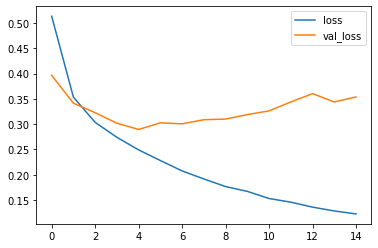

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

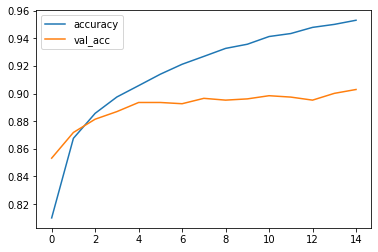

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 2s 6ms/step
Confusion matrix, without normalization
[[886   0  24  17   4   1  64   0   4   0]
 [  3 975   0  13   3   0   5   0   1   0]
 [ 19   1 863  10  45   0  62   0   0   0]
 [ 13   7  14 910  32   0  24   0   0   0]
 [  2   1  53  20 832   0  92   0   0   0]
 [  0   0   0   0   0 980   0  12   0   8]
 [133   0  69  27  74   0 689   0   8   0]
 [  0   0   0   1   0  12   0 957   0  30]
 [  8   0   6   4   4   3   6   3 965   1]
 [  1   0   0   0   0   3   0  24   0 972]]


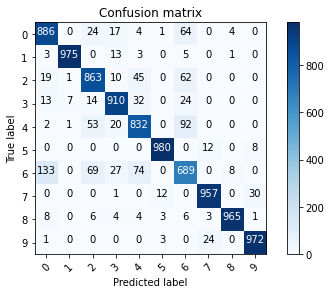

In [19]:
# Plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalized=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalized:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.ewaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalized else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
bag
Ankle bott'''.split()

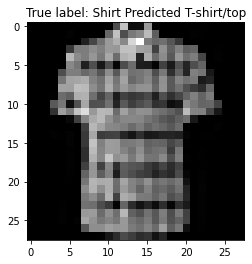

In [30]:
# show some misclassificatied examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted %s" % (labels[y_test[i]], labels[p_test[i]]));